# INTRODUCTION

Ce projet fait partie du programme Udacity Data Analyst Nano Degree (projet 3). 

    Ici, nous effectuerons au cours de ceci une analyse exploratoire de données sur un ensemble de données provenant de Prosper, lié à l'emprunt sur le marché américain.

Il se dubdivise en deux grande partie notamment :
    
    - Une première partie, nous effectuerons une analyse exploratoire des données sur un ensemble de données 
    de notre choix pour ceci pour explorer les variables de cet l'ensemble de données ainsi que les relations entre elles. 
    
    - Une seconde partie, ou nous transmettrons les résultats de notre exploration aux autres par le biais d'une analyse explicative. 

    En suite, nous créerons un diaporama qui s'appuiera sur des visualisations explicatives et soignées pour communiquer 
    nos résultats.

### Le but de notre travail est d'explorer les relations entre différentes variables choisie, en particulier celles liées au taux d'intérêt (Borrower APR ), son comportement faces à ses variables. Il y a donc un intérêt financier important à étudier ce taux sur des prospers.


# Collecte des données

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline 


loan = pd.read_csv("C://Users//HEBRON//Desktop//UDACITY//Projet 3//prosperLoanData.csv")

In [2]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [3]:
loan.shape

(113937, 81)

In [4]:
loan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


Cet ensemble de données contient 113 937 prêts dont 81 variables sur chaque prêt, y compris le montant du prêt, le taux de taux d'intérêt, le statut actuel du prêt, le revenu de l'emprunteur, et bien d'autres.

## Choix des données qui nous sembles importantes et sur lesquelles travaillées¶

In [5]:
# Sélectionnons les caractéristiques d'intérêt que nous allons utilisés.
cols = ['ListingNumber','Term','ListingCreationDate','LoanOriginalAmount','LoanStatus','ListingCategory (numeric)',
        'BorrowerState','BorrowerAPR','BorrowerRate','StatedMonthlyIncome', 'ProsperRating (Alpha)', 'Occupation',
        'EmploymentStatus','TotalInquiries','DebtToIncomeRatio','MonthlyLoanPayment','TotalTrades','Investors',
        'AmountDelinquent','ProsperScore','IncomeRange']

df_loan = loan[cols]

In [6]:
# display information about the subdataset
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ListingNumber              113937 non-null  int64  
 1   Term                       113937 non-null  int64  
 2   ListingCreationDate        113937 non-null  object 
 3   LoanOriginalAmount         113937 non-null  int64  
 4   LoanStatus                 113937 non-null  object 
 5   ListingCategory (numeric)  113937 non-null  int64  
 6   BorrowerState              108422 non-null  object 
 7   BorrowerAPR                113912 non-null  float64
 8   BorrowerRate               113937 non-null  float64
 9   StatedMonthlyIncome        113937 non-null  float64
 10  ProsperRating (Alpha)      84853 non-null   object 
 11  Occupation                 110349 non-null  object 
 12  EmploymentStatus           111682 non-null  object 
 13  TotalInquiries             11

In [7]:
df_loan.duplicated().sum()

0

In [8]:
df_loan.isnull().sum()

ListingNumber                    0
Term                             0
ListingCreationDate              0
LoanOriginalAmount               0
LoanStatus                       0
ListingCategory (numeric)        0
BorrowerState                 5515
BorrowerAPR                     25
BorrowerRate                     0
StatedMonthlyIncome              0
ProsperRating (Alpha)        29084
Occupation                    3588
EmploymentStatus              2255
TotalInquiries                1159
DebtToIncomeRatio             8554
MonthlyLoanPayment               0
TotalTrades                   7544
Investors                        0
AmountDelinquent              7622
ProsperScore                 29084
IncomeRange                      0
dtype: int64

In [9]:
df_loan.head()

,ListingNumber,Term,ListingCreationDate,LoanOriginalAmount,LoanStatus,ListingCategory (numeric),BorrowerState,BorrowerAPR,BorrowerRate,StatedMonthlyIncome,...,Occupation,EmploymentStatus,TotalInquiries,DebtToIncomeRatio,MonthlyLoanPayment,TotalTrades,Investors,AmountDelinquent,ProsperScore,IncomeRange
0,193129,36,2007-08-26 19:09:29.263000000,9425,Completed,0,CO,0.16516,0.1580,3083.333333,...,Other,Self-employed,3.0,0.17,330.43,11.0,258,472.0,NaN,"$25,000-49,999"
1,1209647,36,2014-02-27 08:28:07.900000000,10000,Current,2,CO,0.12016,0.0920,6125.000000,...,Professional,Employed,5.0,0.18,318.93,29.0,1,0.0,7.0,"$50,000-74,999"
2,81716,36,2007-01-05 15:00:47.090000000,3001,Completed,0,GA,0.28269,0.2750,2083.333333,...,Other,Not available,1.0,0.06,123.32,NaN,41,NaN,NaN,Not displayed
3,658116,36,2012-10-22 11:02:35.010000000,10000,Current,16,GA,0.12528,0.0974,2875.000000,...,Skilled Labor,Employed,1.0,0.15,321.45,26.0,158,10056.0,9.0,"$25,000-49,999"
4,909464,36,2013-09-14 18:38:39.097000000,15000,Current,2,MN,0.24614,0.2085,9583.333333,...,Executive,Employed,9.0,0.26,563.97,39.0,20,0.0,4.0,"$100,000+"


In [10]:
#Adjust Datetime columns
df_loan['ListingCreationDate'] = pd.to_datetime(df_loan['ListingCreationDate']) 

df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   ListingNumber              113937 non-null  int64         
 1   Term                       113937 non-null  int64         
 2   ListingCreationDate        113937 non-null  datetime64[ns]
 3   LoanOriginalAmount         113937 non-null  int64         
 4   LoanStatus                 113937 non-null  object        
 5   ListingCategory (numeric)  113937 non-null  int64         
 6   BorrowerState              108422 non-null  object        
 7   BorrowerAPR                113912 non-null  float64       
 8   BorrowerRate               113937 non-null  float64       
 9   StatedMonthlyIncome        113937 non-null  float64       
 10  ProsperRating (Alpha)      84853 non-null   object        
 11  Occupation                 110349 non-null  object  

<ipython-input-10-54da781c0326>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loan['ListingCreationDate'] = pd.to_datetime(df_loan['ListingCreationDate'])


In [11]:
#commencons par convertir ListingCreationDate en datetime
df_loan['ListingCreationDate'] = pd.to_datetime(df_loan['ListingCreationDate'])

#mettons sous la forme année, mois et jour
df_loan['year'] = df_loan['ListingCreationDate'].dt.year.astype(str)
df_loan['month'] = df_loan['ListingCreationDate'].dt.month.astype(str)


#Finally drop timestamp column
df_loan = df_loan.drop('ListingCreationDate', 1)

<ipython-input-11-9d0da9732925>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loan['ListingCreationDate'] = pd.to_datetime(df_loan['ListingCreationDate'])
<ipython-input-11-9d0da9732925>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loan['year'] = df_loan['ListingCreationDate'].dt.year.astype(str)
<ipython-input-11-9d0da9732925>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.year.html

In [12]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ListingNumber              113937 non-null  int64  
 1   Term                       113937 non-null  int64  
 2   LoanOriginalAmount         113937 non-null  int64  
 3   LoanStatus                 113937 non-null  object 
 4   ListingCategory (numeric)  113937 non-null  int64  
 5   BorrowerState              108422 non-null  object 
 6   BorrowerAPR                113912 non-null  float64
 7   BorrowerRate               113937 non-null  float64
 8   StatedMonthlyIncome        113937 non-null  float64
 9   ProsperRating (Alpha)      84853 non-null   object 
 10  Occupation                 110349 non-null  object 
 11  EmploymentStatus           111682 non-null  object 
 12  TotalInquiries             112778 non-null  float64
 13  DebtToIncomeRatio          10

In [13]:
# sélectionnons uniquement les lignes où ProsperRating (alpha) n'est pas null 

df_loan = df_loan[df_loan['ProsperRating (Alpha)'].notnull()]

In [14]:
# filling missing values for the Occupation as unknown

df_loan.Occupation = df_loan.Occupation.fillna('Unknown')

In [15]:
# filling in missing values of DebtToIncomeRatio as mean of the column

df_loan.DebtToIncomeRatio = df_loan.DebtToIncomeRatio.fillna(df_loan.DebtToIncomeRatio.mean())

In [16]:
# converting datatypes of the required columns

df_loan.TotalInquiries = df_loan.TotalInquiries.astype(int)
df_loan.TotalTrades = df_loan.TotalTrades.astype(int)

In [17]:
df_loan['ProsperRating (Alpha)'].value_counts()

C     18345
B     15581
A     14551
D     14274
E      9795
HR     6935
AA     5372
Name: ProsperRating (Alpha), dtype: int64

In [18]:
df_loan['IncomeRange'].value_counts()

$50,000-74,999    25627
$25,000-49,999    24175
$100,000+         15205
$75,000-99,999    14498
$1-24,999          4654
Not employed        649
$0                   45
Name: IncomeRange, dtype: int64

In [19]:
# Convert IncomeRange to ordinal categorical 
ordinal_var_dict = {'IncomeRange':['$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_var_dict[var])
    df_loan[var] = df_loan[var].astype(ordered_var)

In [20]:
df_loan['IncomeRange'].value_counts()

$50,000-74,999    25627
$25,000-49,999    24175
$100,000+         15205
$75,000-99,999    14498
$1-24,999          4654
$0                   45
Name: IncomeRange, dtype: int64

In [21]:
df_loan['Occupation'].value_counts()

Other                          21317
Professional                   10542
Executive                       3468
Computer Programmer             3236
Teacher                         2888
                               ...  
Judge                             22
Student - College Freshman        17
Student - College Sophomore       16
Student - Community College       10
Student - Technical School         2
Name: Occupation, Length: 68, dtype: int64

In [22]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   ListingNumber              84853 non-null  int64   
 1   Term                       84853 non-null  int64   
 2   LoanOriginalAmount         84853 non-null  int64   
 3   LoanStatus                 84853 non-null  object  
 4   ListingCategory (numeric)  84853 non-null  int64   
 5   BorrowerState              84853 non-null  object  
 6   BorrowerAPR                84853 non-null  float64 
 7   BorrowerRate               84853 non-null  float64 
 8   StatedMonthlyIncome        84853 non-null  float64 
 9   ProsperRating (Alpha)      84853 non-null  object  
 10  Occupation                 84853 non-null  object  
 11  EmploymentStatus           84853 non-null  object  
 12  TotalInquiries             84853 non-null  int32   
 13  DebtToIncomeRatio          848

In [23]:
#Adjust datatype for all other categorical columns
df_loan['Occupation'] = df_loan['Occupation'].astype('category')

df_loan['BorrowerState'] = df_loan['BorrowerState'].astype('category')

df_loan['LoanStatus'] = df_loan['LoanStatus'].astype('category')

df_loan['ListingCategory (numeric)'] = df_loan['ListingCategory (numeric)'].astype('category')

df_loan['EmploymentStatus'] = df_loan['EmploymentStatus'].astype('category')

# Analyse exploratoire des données

In [24]:
# display information about the cleaned dataset
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   ListingNumber              84853 non-null  int64   
 1   Term                       84853 non-null  int64   
 2   LoanOriginalAmount         84853 non-null  int64   
 3   LoanStatus                 84853 non-null  category
 4   ListingCategory (numeric)  84853 non-null  category
 5   BorrowerState              84853 non-null  category
 6   BorrowerAPR                84853 non-null  float64 
 7   BorrowerRate               84853 non-null  float64 
 8   StatedMonthlyIncome        84853 non-null  float64 
 9   ProsperRating (Alpha)      84853 non-null  object  
 10  Occupation                 84853 non-null  category
 11  EmploymentStatus           84853 non-null  category
 12  TotalInquiries             84853 non-null  int32   
 13  DebtToIncomeRatio          848

In [25]:
# descriptive statistics for numeric variables
df_loan.describe()

,ListingNumber,Term,LoanOriginalAmount,BorrowerAPR,BorrowerRate,StatedMonthlyIncome,TotalInquiries,DebtToIncomeRatio,MonthlyLoanPayment,TotalTrades,Investors,AmountDelinquent,ProsperScore
count,8.485300e+04,84853.000000,84853.000000,84853.000000,84853.000000,8.485300e+04,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000
mean,7.738749e+05,42.486135,9083.440515,0.226658,0.196022,5.931175e+03,4.290396,0.258752,291.930720,23.928571,68.264669,950.773797,5.950067
std,2.363387e+05,11.640346,6287.860058,0.079916,0.074631,8.239944e+03,3.827574,0.304333,186.678314,11.607638,95.195831,7419.574684,2.376501
min,4.162750e+05,12.000000,1000.000000,0.045830,0.040000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
25%,5.580860e+05,36.000000,4000.000000,0.163280,0.135900,3.434000e+03,2.000000,0.160000,157.330000,16.000000,1.000000,0.000000,4.000000
50%,7.392460e+05,36.000000,7500.000000,0.219450,0.187500,5.000000e+03,3.000000,0.240000,251.940000,23.000000,32.000000,0.000000,6.000000
75%,9.794360e+05,60.000000,13500.000000,0.292540,0.257400,7.083333e+03,6.000000,0.310000,388.350000,31.000000,97.000000,0.000000,8.000000
max,1.255725e+06,60.000000,35000.000000,0.423950,0.360000,1.750003e+06,78.000000,10.010000,2251.510000,122.000000,1189.000000,463881.000000,11.000000


**Structure de votre ensemble de données***

- Notre ensemble de données contient 84853 prêts avec 22 caractéristiques (dont LoanOriginalAmount, BorrowerAPR, StatedMonthlyIncome, ProsperRating (Alpha), EmploymentStatus, Prosperscore, Incomerange etc...).

**Il y a quelques caractéristiques importantes à examiner, notamment** :

- BorrowerAPR: The Borrower's Annual Percentage Rate (APR) for the loan.
- Comment le statut d'emploi et le ratio dette-revenu sont associés à diverses mesures dans l'ensemble de données.
- ProsperScore: A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or * lowest risk score. Applicable for loans originated after July 2009.


**les caractéristiques de l'ensemble de données qui, selon vnus, vous aideront à mener notre enquête sur les caractéristiques qui nous intéressent sont**

Je pense que le montant total du prêt aura un effet négatif sur le TAEG du prêt : plus le montant total du prêt est élevé, plus le TAEG est bas. Je pense également que le revenu mensuel déclaré de l'emprunteur, la durée du prêt, la notation Prosper et le statut professionnel auront également des effets sur le TAEG. Le statut professionnel et la profession auront une incidence sur la cote Prosper et le montant du prêt.


# Univariate Exploration


Nous commencerons par les caractéristiques les plus importantes : Borrower APR , Prosper Score, Debt IncomeRatio and Stated Monthly Income

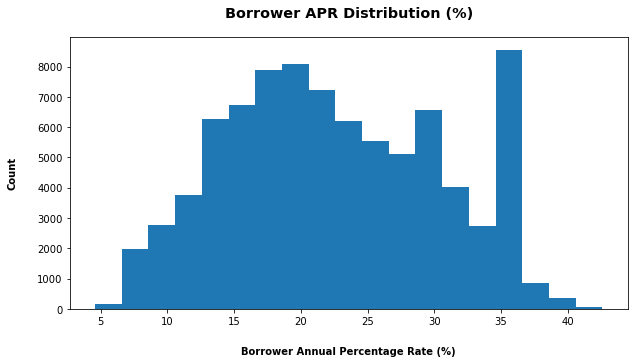

In [65]:
# Distribution de Borrower APR en percentage 

binsize = 2
borrowe_APR_percentage = df_loan['BorrowerAPR']*100
bins = np.arange(df_loan['BorrowerAPR'].min()*100, df_loan['BorrowerAPR'].max()*100+binsize, binsize)

plt.figure(figsize=[10, 5])
plt.hist(x = borrowe_APR_percentage, bins = bins)

plt.title('Borrower APR Distribution (%)', fontweight = "bold",fontsize='x-large', y = 1.05)
plt.xlabel('Borrower Annual Percentage Rate (%)', fontweight = "semibold", labelpad=20, fontsize = "medium")
plt.ylabel('Count', fontweight = "semibold", labelpad=20, fontsize = "medium")

plt.xticks([5, 10, 15, 20, 25, 30, 35, 40], ['5','10', '15', '20', '25', '30', '35', '40'])
plt.show()

Nous constatons que le taux d'emprunt est normalement distribué avec un pic entre 15% et 20% et qui est egalement légèrement observable au alentour de 35%.

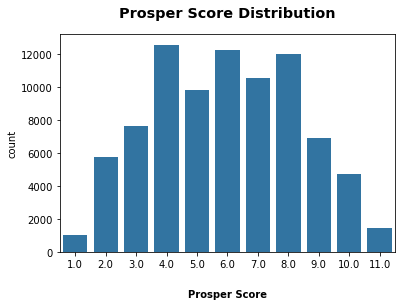

In [71]:
#Prosper Score Distribution (range form 1 to 10)
base_color = sb.color_palette()[0]

sb.countplot(data=df_loan, x= 'ProsperScore', color=base_color)

plt.title('Prosper Score Distribution',fontweight = "bold",fontsize='x-large', y = 1.05)
plt.xlabel('Prosper Score',fontweight = "semibold", labelpad=20, fontsize = "medium");



Le Score des Prosper est normalement distribués et est plus courant pour les valeurs 4, 6 et 8

Text(0, 0.5, 'Count')

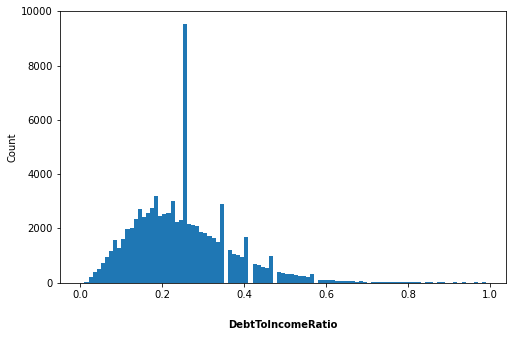

In [91]:
# distribution of DebtToIncomeRatio 
bins = np.arange(0,1, 0.01)
plt.figure(figsize=[8, 5])

plt.hist(data = df_loan, x = 'DebtToIncomeRatio', bins = bins);
plt.xlabel('DebtToIncomeRatio',fontweight = "semibold", labelpad=20, fontsize = "medium");
plt.ylabel('Count')

Ici, La distribution présente un pic unimodal légèrement en dessous de 0,2 avec un pic inhabituel autour de 0,25, ce qui indique que la plupart des gens préfèrent un ratio dette/revenu de 1:4, ce qui est une bonne chose.

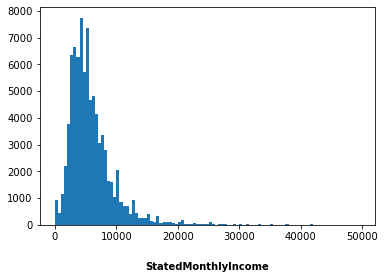

In [74]:
# Distribution of stated monthly income

bins_smi = np.arange(0, 50000, 500)
plt.hist(data = df_loan, x = 'StatedMonthlyIncome', bins=bins_smi);
plt.xlabel('StatedMonthlyIncome',fontweight = "semibold", labelpad=20, fontsize = "medium");

Ici, La distribution des revenus mensuels déclarés est sévèrement concentrée à droite, avec des revenus mensuels déclarés inférieurs à 30 000 et un pic avoisinant 6 000. 


**Examinons les distributions de la profession, de Prosper et de la situation professionnelle.**

In [30]:
df_loan['EmploymentStatus']

1          Employed
3          Employed
4          Employed
5          Employed
6          Employed
            ...    
113932     Employed
113933     Employed
113934     Employed
113935    Full-time
113936     Employed
Name: EmploymentStatus, Length: 84853, dtype: category
Categories (7, object): ['Employed', 'Full-time', 'Not employed', 'Other', 'Part-time', 'Retired', 'Self-employed']

In [31]:
df_loan['ProsperRating (Alpha)']

1         A
3         A
4         D
5         B
6         E
         ..
113932    C
113933    A
113934    D
113935    C
113936    A
Name: ProsperRating (Alpha), Length: 84853, dtype: object

In [32]:
df_loan['Occupation']

1                    Professional
3                   Skilled Labor
4                       Executive
5                    Professional
6                  Sales - Retail
                   ...           
113932    Food Service Management
113933               Professional
113934                      Other
113935               Food Service
113936                  Professor
Name: Occupation, Length: 84853, dtype: category
Categories (68, object): ['Accountant/CPA', 'Administrative Assistant', 'Analyst', 'Architect', ..., 'Tradesman - Plumber', 'Truck Driver', 'Unknown', 'Waiter/Waitress']

In [110]:
# Convert ProsperRating status into ordered categorical types
rate_order = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = rate_order)
df_loan['ProsperRating (Alpha)'] = df_loan['ProsperRating (Alpha)'].astype(ordered_var)

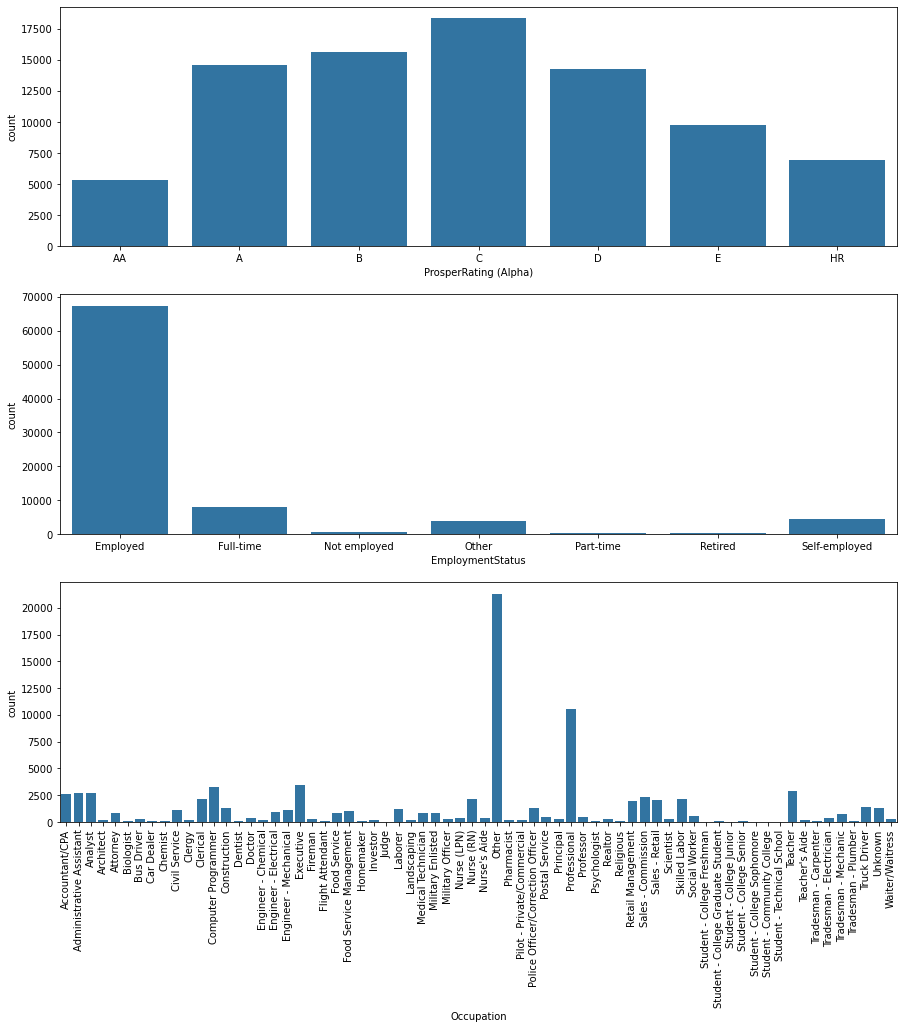

In [111]:
fig, ax = plt.subplots(nrows=3, figsize = [15,15])
default_color = sb.color_palette()[0]

sb.countplot(data = df_loan, x = 'ProsperRating (Alpha)', color = default_color, ax = ax[0])
sb.countplot(data = df_loan, x = 'EmploymentStatus', color = default_color, ax = ax[1]);
sb.countplot(data = df_loan, x = 'Occupation', color = default_color, ax = ax[2]);


plt.xticks(rotation=90);

**Note**

    - Les notes de la plupart des emprunteurs se situent entre A et D. 
    - La plupart des emprunteurs sont employés et à temps plein.

# Bivariate Exploration

In [35]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   ListingNumber              84853 non-null  int64   
 1   Term                       84853 non-null  int64   
 2   LoanOriginalAmount         84853 non-null  int64   
 3   LoanStatus                 84853 non-null  category
 4   ListingCategory (numeric)  84853 non-null  category
 5   BorrowerState              84853 non-null  category
 6   BorrowerAPR                84853 non-null  float64 
 7   BorrowerRate               84853 non-null  float64 
 8   StatedMonthlyIncome        84853 non-null  float64 
 9   ProsperRating (Alpha)      84853 non-null  category
 10  Occupation                 84853 non-null  category
 11  EmploymentStatus           84853 non-null  category
 12  TotalInquiries             84853 non-null  int32   
 13  DebtToIncomeRatio          848

In [36]:
num_vars = ['BorrowerAPR', 'StatedMonthlyIncome','DebtToIncomeRatio', 'Investors','LoanOriginalAmount' ]

cat_vars = ['ProsperRating (Alpha)', 'EmploymentStatus','Term', 'LoanStatus', 'IncomeRange']

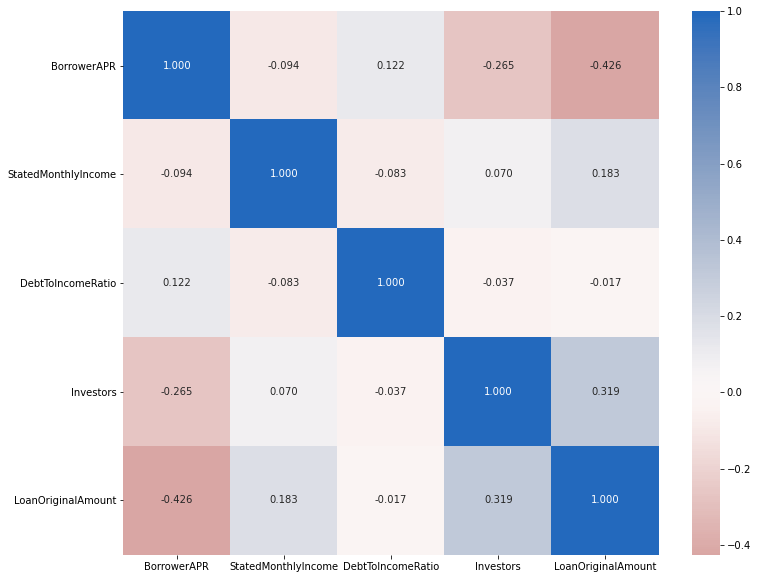

In [37]:
# correlation plot

plt.figure(figsize = [12, 10])

sb.heatmap(df_loan[num_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0);

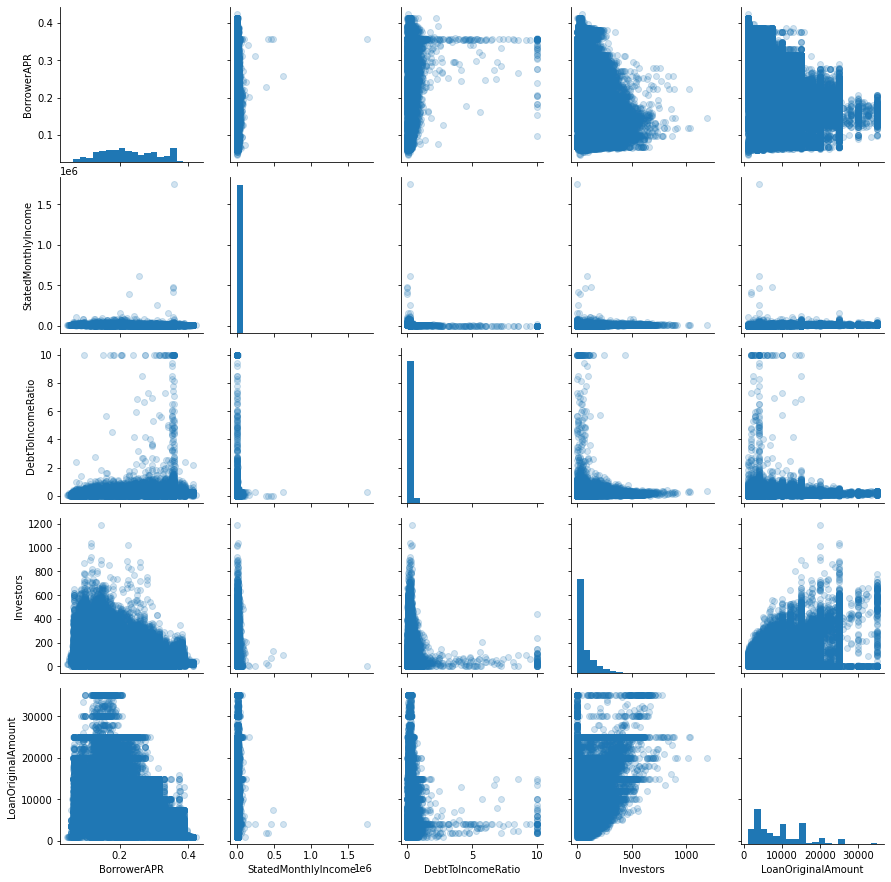

In [38]:
# plot matrix
g = sb.PairGrid(data = df_loan, vars = num_vars)
g = g.map_diag(plt.hist, bins=20)
g.map_offdiag(plt.scatter, alpha=0.2);

***Note***

    - Le coefficient de corrélation du taux d'emprunt et du montant initial du prêt est de -0,426. Le diagramme de dispersion montre également que ces deux variables sont négativement corrélées.ce qui laisse comprendre que plus le montant du prêt est élevé, plus le taux d'emprunt (taux d'intérêt) est faible.
    - Le montant initial du prêt est positivement corrélé avec le revenu mensuel déclaré, ce qui est logique puisque les emprunteurs ayant un revenu mensuel plus élevé peuvent prêter plus d'argent.

Aussi, nous relevons que l'investissement est négativement correlés avec le taux d'emprunt car, une hausse du taux d'intérêt réduit la consommation des prospers. Or celui-ci est positivement correlé au revenu mensuel déclare ce qui pourrait signifier que les propers investissent plus lorsqu'ils ont des revenus élevés.

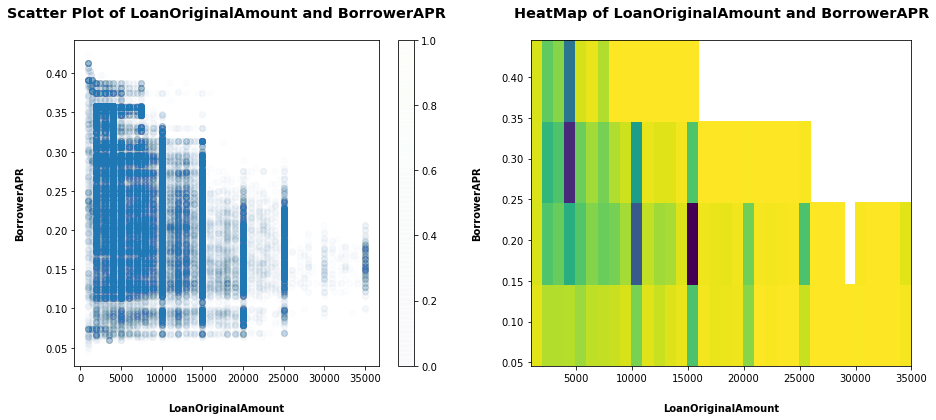

In [80]:
# Checking the relation between LoanOriginalAmount and BorrowerAPR

plt.figure(figsize = [15, 6]) 
plt.subplot(1, 2, 1)
plt.scatter(data = df_loan, x = 'LoanOriginalAmount', y = 'BorrowerAPR',  alpha =  0.01)

plt.title('Scatter Plot of LoanOriginalAmount and BorrowerAPR', fontweight = "bold",fontsize='x-large', y = 1.05)
plt.xlabel('LoanOriginalAmount',fontweight = "semibold", labelpad=20, fontsize = "medium")
plt.ylabel('BorrowerAPR',fontweight = "semibold", labelpad=20, fontsize = "medium");
plt.colorbar();

plt.subplot(1, 2, 2)
bins_x = np.arange(df_loan['LoanOriginalAmount'].min(), df_loan['LoanOriginalAmount'].max()+1000, 1000)
bins_y = np.arange(df_loan['BorrowerAPR'].min(), df_loan['BorrowerAPR'].max()+0.1, 0.1)
plt.hist2d(data = df_loan, x = 'LoanOriginalAmount', y = 'BorrowerAPR', bins = [bins_x, bins_y], 
               cmap = 'viridis_r', cmin = 0.5)

plt.title('HeatMap of LoanOriginalAmount and BorrowerAPR',fontweight = "bold",fontsize='x-large', y = 1.05)
plt.xlabel('LoanOriginalAmount',fontweight = "semibold", labelpad=20, fontsize = "medium")
plt.ylabel('BorrowerAPR',fontweight = "semibold", labelpad=20, fontsize = "medium");

**Note**

Ici, nous constatons une relation négative entre le montant initial du prêt et le taux d'intérêt annuel de l'emprunteur, ce qui signifie que les prêts importants ont un taux d'intérêt annuel relativement faible de la part de l'emprunteur (chose qui peut etre verifiable dans la vie courante).

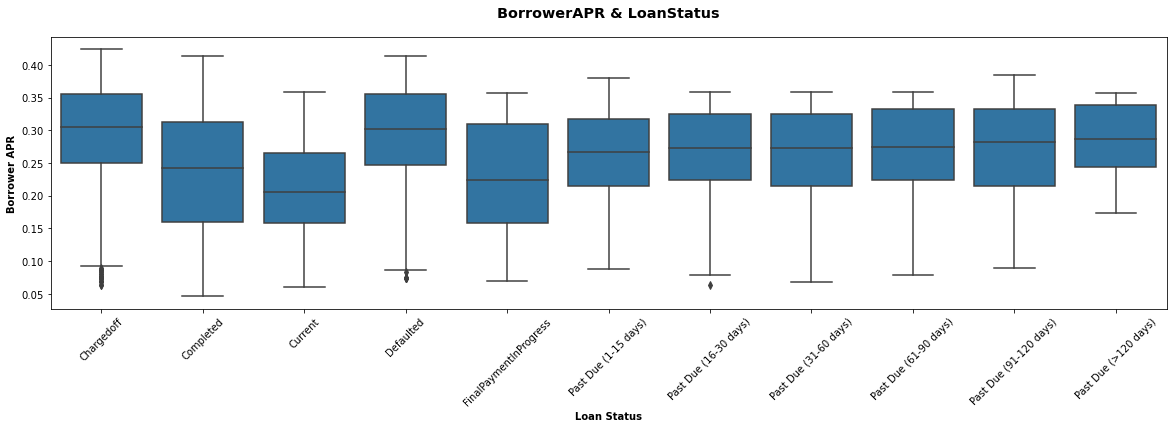

In [81]:
# LoanStatus vs Borrower APR  

plt.figure(figsize = [20, 5])

sb.boxplot(data=df_loan,y='BorrowerAPR',x='LoanStatus',color=base_color);

plt.title('BorrowerAPR & LoanStatus',fontweight = "bold",fontsize='x-large', y = 1.05);
plt.ylabel('Borrower APR',fontweight = "semibold");
plt.xlabel('Loan Status',fontweight = "semibold");

plt.xticks(rotation=45);

**Note**
  - Nous remarquons que les prêts en cours et terminés ont un taux plus faible que les prêts en retard et ont une moyenne plus faible.

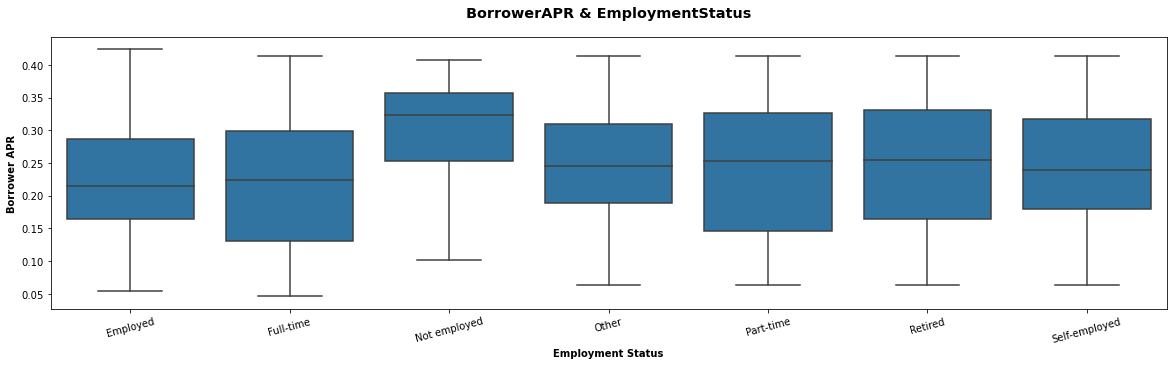

In [95]:
# Borrower APR vs EmploymentStatus
plt.figure(figsize = [20, 5])

sb.boxplot(data=df_loan,y='BorrowerAPR',x='EmploymentStatus',color=base_color);

plt.title('BorrowerAPR & EmploymentStatus',fontweight = "bold",fontsize='x-large', y = 1.05);

plt.ylabel('Borrower APR', fontweight = "semibold");
plt.xlabel('Employment Status', fontweight = "semibold");

plt.xticks(rotation=15);

**Note**
- Nous remarquons ici également que les personnes employées ont un écart interquartile sensiblement inférieur à celui des personnes non employées.

### Relationships between categorical features.

C:\Users\HEBRON\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HEBRON\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HEBRON\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HEBRON\ana

<Figure size 720x720 with 0 Axes>

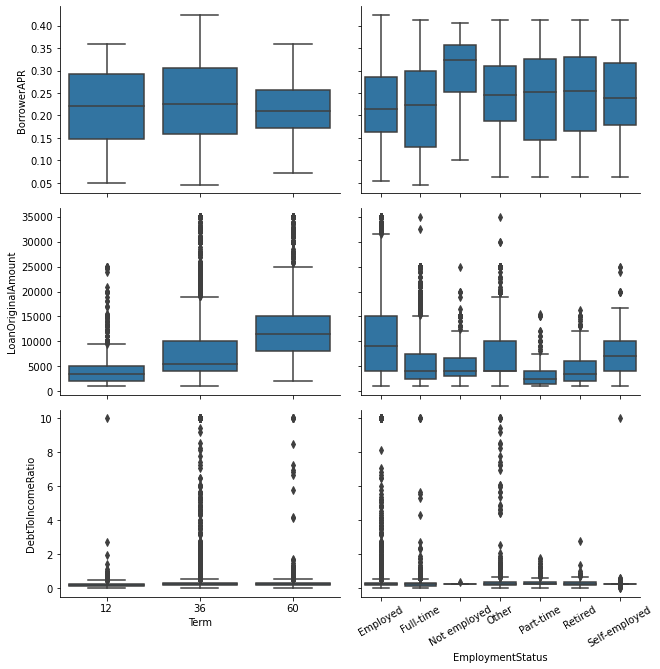

In [60]:
# plot matrix of numeric features against categorical features.

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = df_loan, y_vars = ['BorrowerAPR', 'LoanOriginalAmount','DebtToIncomeRatio'], 
                x_vars = ['Term','EmploymentStatus'], height = 3, aspect = 1.5)
g.map(boxgrid);

plt.xticks(rotation=30);

Le graphique montre que :

    - le montant initial du prêt augmente avec l'augmentation de la durée du prêt. 
    - Les emprunteurs salariés, indépendants et à temps plein ont un revenu mensuel et un montant de prêt plus élevés que les emprunteurs à temps partiel, retraités et sans emploi.


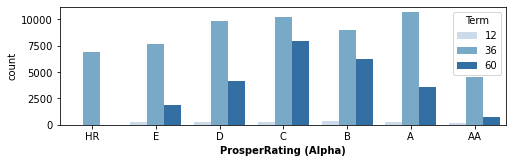

In [58]:
plt.figure(figsize = [8, 10])

# subplot 1: Prosper rating vs term
plt.subplot(4, 1, 1)
sb.countplot(data = df_loan, x = 'ProsperRating (Alpha)', hue = 'Term', palette = 'Blues');
plt.xlabel('ProsperRating (Alpha)', fontweight = "semibold");

Nous constatons ici qu'il y a une interaction entre la durée du prêt et la notation du Prosper. Aussi, il y a plus de prêts de 60 mois sur les notations B et C. le disgramme revèle aussi qu'il n'y a que des prêts de 36 mois pour les emprunteurs de la catégorie HR.

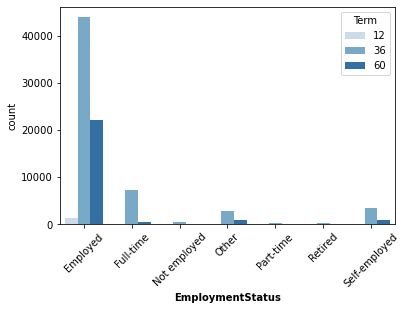

In [57]:
# subplot 2: employment status vs. term


sb.countplot(data = df_loan, x = 'EmploymentStatus', hue = 'Term', palette = 'Blues')
plt.xlabel('EmploymentStatus', fontweight = "semibold");

plt.xticks(rotation = 45);


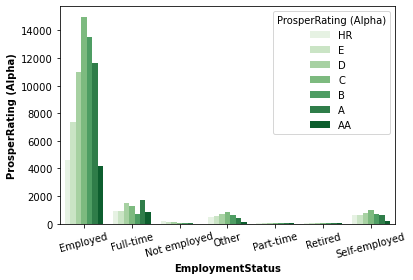

In [45]:
# subplot 3: Prosper rating vs. employment status, use different color palette

sb.countplot(data = df_loan, x = 'EmploymentStatus', hue = 'ProsperRating (Alpha)', palette = 'Greens')

plt.xticks(rotation = 15);

plt.xlabel('EmploymentStatus', fontweight = "semibold");
plt.ylabel('ProsperRating (Alpha)', fontweight = "semibold");

    - La variable du statut d'emploi ne contient pas suffisamment de données sur les emprunteurs à temps partiel, retraités et sans emploi pour montrer la dépendance ou non avec les variables de durée et de notation de Prosper.
    

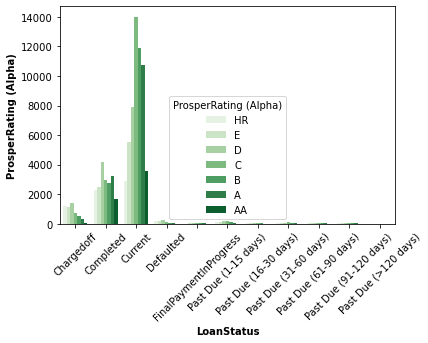

In [56]:
# subplot 4: Prosper rating vs. Loan status, use different color palette

sb.countplot(data = df_loan, x = 'LoanStatus', hue = 'ProsperRating (Alpha)', palette = 'Greens')

plt.xticks(rotation = 45);

plt.xlabel('LoanStatus', fontweight = "semibold");
plt.ylabel('ProsperRating (Alpha)', fontweight = "semibold");

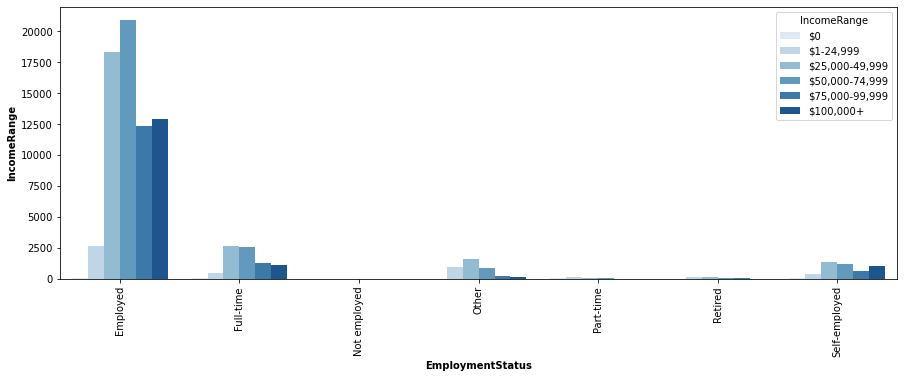

In [47]:
# subplot 4 IncomeRange vs Employment Status
plt.figure(figsize = [15,5])
sb.countplot(data = df_loan, x = 'EmploymentStatus', hue = 'IncomeRange', palette = 'Blues');

plt.xticks(rotation=90);
plt.xlabel('EmploymentStatus', fontweight = "semibold");
plt.ylabel('IncomeRange', fontweight = "semibold");

***Vérifions comment évolue le taux d'emprunt et le montant initial du prêt***

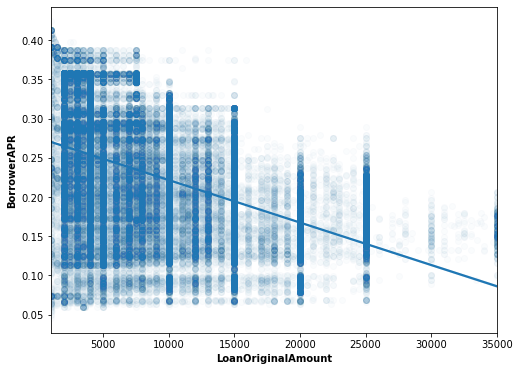

In [48]:
plt.figure(figsize = [8, 6])
sb.regplot(data = df_loan, x = 'LoanOriginalAmount', y = 'BorrowerAPR', scatter_kws={'alpha':0.02});

plt.xlabel('LoanOriginalAmount', fontweight = "semibold");
plt.ylabel('BorrowerAPR', fontweight = "semibold");

Nous constatons une correlation négative entre le taux d'emprunt et le montant initial de prêt car celui-ci diminue avec l'augmentation du montant de prêt

# Multivariate Exploration

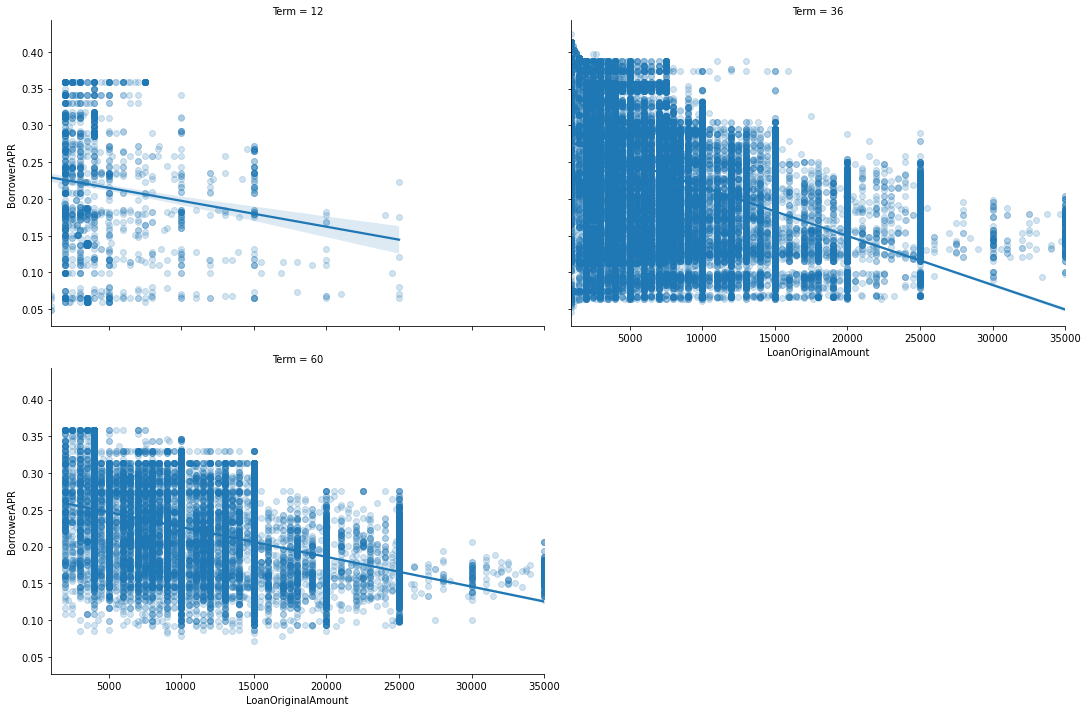

In [109]:
# Term on relationship of APR and loan amount

g=sb.FacetGrid(data= df_loan, aspect=1.5, height=5, col='Term', col_wrap=2)

g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.05, scatter_kws={'alpha':0.2});
g.add_legend();

Ici, nous constatons que la durée ne semble pas avoir d'effet sur la relation entre le taux d'emprunt et le montant du prêt.

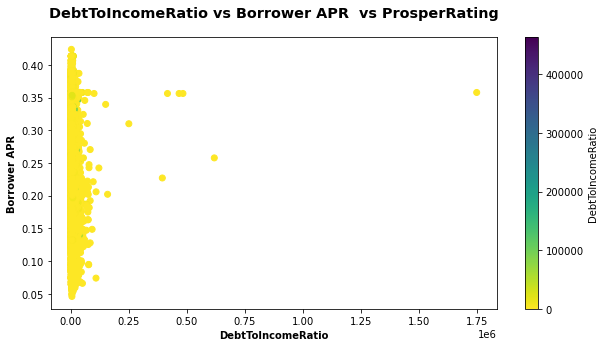

In [84]:
# StatedMonthlyIncome vs Borrower APR  vs ProsperRating
plt.figure(figsize = [10, 5])

plt.scatter(data=df_loan, x='StatedMonthlyIncome',y = 'BorrowerAPR',c='AmountDelinquent',cmap = 'viridis_r')
plt.colorbar(label = 'DebtToIncomeRatio');

plt.title('DebtToIncomeRatio vs Borrower APR  vs ProsperRating', fontweight = "bold",fontsize='x-large', y = 1.05);
plt.xlabel('DebtToIncomeRatio', fontweight = "semibold");
plt.ylabel('Borrower APR', fontweight = "semibold");

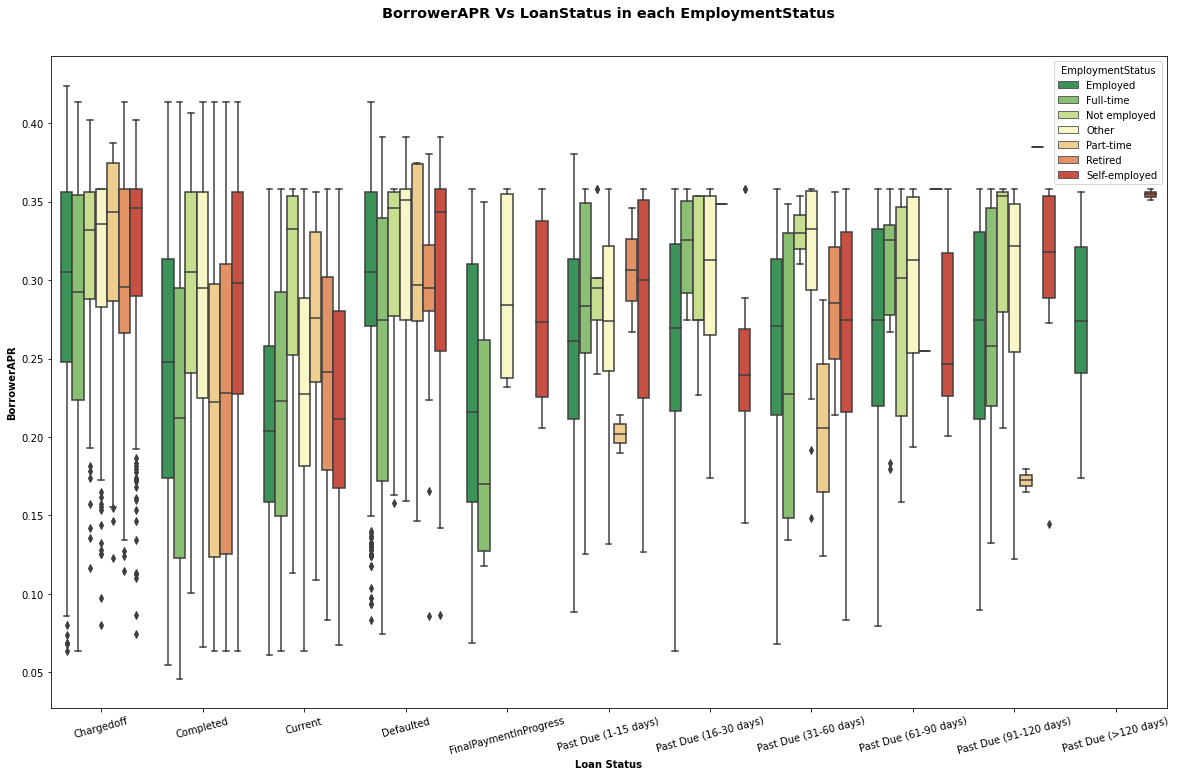

In [85]:
# LoanStatus Vs BorrowerAPR in each EmploymentStatus
plt.figure(figsize=[20,12])

sb.boxplot(data=df_loan, x="LoanStatus", y="BorrowerAPR", hue="EmploymentStatus", palette="RdYlGn_r");

plt.title('BorrowerAPR Vs LoanStatus in each EmploymentStatus',fontweight = "bold",fontsize='x-large', y = 1.05);
plt.xlabel('Loan Status', fontweight = "semibold");
plt.ylabel('BorrowerAPR', fontweight = "semibold");
plt.xticks(rotation = 15);

- Pour chaque catégorie de statut de prêt, le taux d'emprunt le plus bas est celui des personnes employées et à temps plein. Alors que le taux d'emprunt le plus élevé est celui des personnes sans emploi.
- La plupart des taux d'emprunt élevés se situent au niveau de la radiation, de l'achèvement et de la situation actuelle.


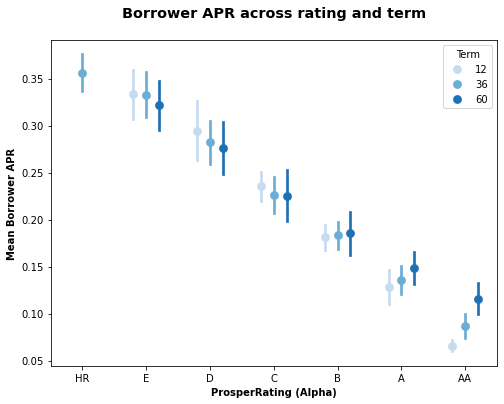

In [86]:
# ProsperRating (Alpha) Vs BorrowerAPR in each Term

fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = df_loan, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR', hue = 'Term', palette = 'Blues', 
                  linestyles = '', dodge = 0.4, ci='sd')

plt.title('Borrower APR across rating and term',fontweight = "bold",fontsize='x-large', y = 1.05)
plt.ylabel('Mean Borrower APR', fontweight = "semibold")
plt.xlabel('ProsperRating (Alpha)', fontweight = "semibold");
ax.set_yticklabels([],minor = True);

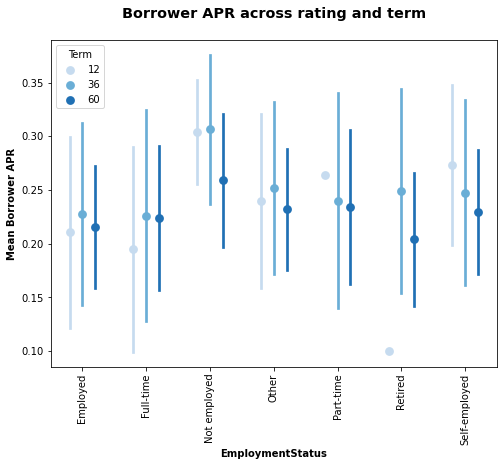

In [87]:
# EmploymentStatus Vs BorrowerAPR in each Term

fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = df_loan, x = 'EmploymentStatus', y = 'BorrowerAPR', hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.4, ci='sd')

plt.title('Borrower APR across rating and term',fontweight = "bold",fontsize='x-large', y = 1.05)
plt.ylabel('Mean Borrower APR', fontweight = "semibold")
plt.xlabel('EmploymentStatus', fontweight = "semibold");
ax.set_yticklabels([],minor = True);
plt.xticks(rotation = 90);

Il est intéressant de noter que le Taux d'emprunt diminue avec l'augmentation de la durée de l'emprunt pour certaines personnes. Mais pour d'autres celui-ci augmente avec l'augmentation de la durée de l'emprunt.

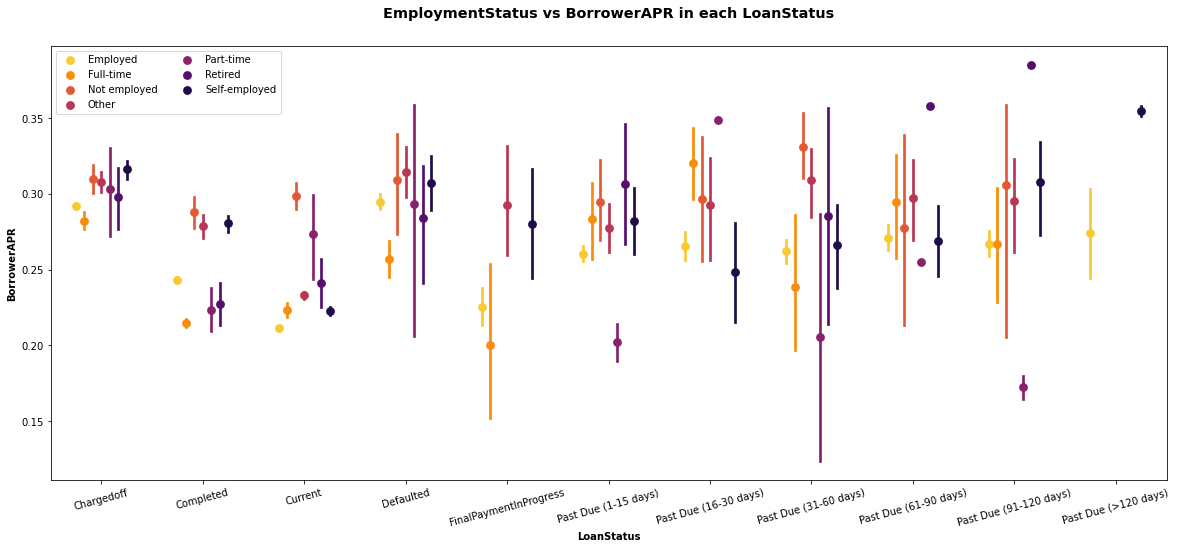

In [88]:
# EmploymentStatus vs BorrowerAPR in each LoanStatus

fig = plt.figure(figsize = [20,8])
ax = sb.pointplot(data = df_loan, x = 'LoanStatus', y = 'BorrowerAPR', hue = 'EmploymentStatus', linestyles = "", dodge = 0.5, 
                  palette = 'inferno_r')

plt.title('EmploymentStatus vs BorrowerAPR in each LoanStatus',fontweight = "bold",fontsize='x-large', y = 1.05)
plt.ylabel('BorrowerAPR', fontweight = "semibold")
plt.xticks(rotation=15)
plt.xlabel('LoanStatus', fontweight = "semibold");
plt.legend(ncol=2)

plt.show();

Nous constatons que quelle que soit la situation professionnelle, les prêts en souffrance ont généralement des taux d'intérêt plus élevés, 

### Réflexion

- Après avoir obtenu quelques idées sur les variables individuelles pour ce projet, nous avons travaillé  sur un ensemble de données de Prosper qui comprend 22 variables et 84 853 observations. Ainsi, la première étape était de comprendre la signification de chaque variable et, le taux d'emprunt nous ai apparu comme variable cible.

- Exploration des données univariées, bivariées et multivariées nous à permis d'explorer les relations entre nos variables, en particulier celles liées au taux d'emprunt. Le nuage de points est le graphique le plus couramment utilisé pour montrer les relations entre deux variables. Une façon simple de montrer les relations entre plusieurs variables est d'ajouter des couleurs au graphique. Utiliser différentes couleurs pour représenter les variables factorielles. 

### Limites

- Les difficultés que j'ai rencontrées dans ce projet provenaient principalement de la compréhension des variables et de la sélectiode celle-ci pour une analyse plus appropriée.
- L'analyse exploratoire des données est un bon moyen de connaître les données à l'aide de visualisations. Toutefois, pour démontrer une meilleure correlation relations entre les variables, nous devons pousser notre analyse en effectuant des tests statistiques et voir en construisant des modèles prédictifs.

In [55]:
# save cleaned dataset for part 2
df_loan.to_csv('LoanData_cleaned.csv')

***Se fût une excellente expérience d'apprentissage sur le modèle de prêt et je suis heureux que l'on m'ait donné l'opportunité d'accéder à ces données et de verifier les compétances acquise en cours***.